# 字符串

### 最长回文子串

In [ ]:
class Solution:
    def longestPalindrome(self,s):
# ======================中心扩散法========================================
    #     start=1
    #     maxlen=0
    #     n=len(s)
    #     for i in range(n):
    #         l1=self.mirror(s,i,i)
    #         l2=self.mirror(s,i,i+1)
    # # 得到的返回值，是l[0]为起始下标，为l[1]为长度 的列表
    # #longest=max(l1,l2)
    #         if l1[1]>l2[1]:
    #             longest=l1
    #         else:
    #             longest=l2
                
    # # maxlen=max(maxlen,longest)        
    #         if longest[1]>maxlen:
    #             maxlen=longest[1]
    #             start=longest[0]
            
    #     return s[start:start+maxlen]

    # def mirror(self,s,i,j):  
    #     while i>=0 and j<=len(s)-1 and s[i]==s[j]:       
    #         i -=1
    #         j +=1
    #     startindex =i+1
    #     l=(j-1)-(i+1)+1
    #     return startindex,l

    
# ======================DP table========================================
        n =len(s)
        if n==0 or n==1:
            return s

        dp = [[0]*n for i in range(n)]# dp table的左下半边，全为0
        for i in range(n):
            dp[i][i]=1  #头尾都为i，长度为1
        

        maxlen=0
        for i in range(n-1,-1,-1):
            for j in range(i+1,n):
        # 从dp[n-1][n-1]开始

        #因为我们需要求 连续的subsequence最大值，所以没必要求断了的部分
        

# 有三种连续的方式，头往前一个，尾往后一个，头尾都向外一个
                if s[i]==s[j] and dp[i+1][j-1]==j-i-1:
                    # 我知道了！ 如果要连续的话，再补充一个条件！ dp[i+1][j-1]==j-i-1
                    dp[i][j]=dp[i+1][j-1]+2  #头尾都向外一个                 
                else:
                    dp[i][j]=max(dp[i+1][j],dp[i][j-1]) #头往前一个，尾往后一个
                if maxlen<dp[i][j]:
                    start=i
                    maxlen=dp[i][j]
                    
        return s[start:start+maxlen]

### 最长回文子序列

In [ ]:
class Solution:
    def longestPalindromeSubseq(self, s: str):
# ======================连续回文子序列==================================
    #     start=1
    #     maxlen=0
    #     n=len(s)
    #     for i in range(n):
    #         l1=self.mirror(s,i,i)
    #         l2=self.mirror(s,i,i+1)
    # # 得到的返回值，是l[0]为起始下标，为l[1]为长度 的列表
    # #longest=max(l1,l2)
    #         if l1[1]>l2[1]:
    #             longest=l1
    #         else:
    #             longest=l2
                
    # # maxlen=max(maxlen,longest)        
    #         if longest[1]>maxlen:
    #             maxlen=longest[1]
    #             start=longest[0]
            
    #     return maxlen

    # def mirror(self,s,i,j):  
    #     while i>=0 and j<=len(s)-1 and s[i]==s[j]:       
    #         i -=1
    #         j +=1
    #     startindex =i+1
    #     l=(j-1)-(i+1)+1
    #     return startindex,l


    # ================不连续回文子序列========================
        n =len(s)
        dp = [[0]*n for i in range(n)]
        for i in range(n):
            dp[i][i]=1
        
        for i in range(n-1,-1,-1):
            for j in range(i+1,n):
        # 从dp[n-1][n-1]开始
        # 我知道了！ 如果要连续的话，再补充一个条件！ dp[i][j]==j-i+1
                if s[i]==s[j]:
                    dp[i][j]=dp[i+1][j-1]+2

                else:
                    dp[i][j]=max(dp[i+1][j],dp[i][j-1])

        return dp[0][-1]

### 编辑距离

In [ ]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
# dp[0][j]=j str1空,w1要增加j个元素,j次操作
# dp[i][0]=i str2空,w1要减少i个元素,i次操作
# 从三种操作中选一个
# dp[i-1][j-1] 替换
# dp[i-1][j]+1 当前str1(len=i)为了能变成str2(len=j)再删除一个元素
# dp[i][j-1]+1 当前str1(len=i)为了能变成str2(len=j)再添加一个元素 (w1='a', w1='ab')
        m =len(word1)+1
        n =len(word2)+1
        dp =[[0]*n for i in range(m)]
        for i in range(m):
            dp[i][0]=i
        for j in range(n):
            dp[0][j]=j
        for i in range(1,m):
            for j in range(1,n):
                if word1[i-1]==word2[j-1]:
                    dp[i][j]=dp[i-1][j-1]
                else:
                    dp[i][j]=min(dp[i][j-1],dp[i-1][j],dp[i-1][j-1])+1
        return dp[-1][-1]

# 数组

### 最长上升子序列

In [ ]:
class Solution:
    def lengthOfLIS(self, nums: List[int]):
        n=len(nums)
        dp =[1]*n
        maxdp=1
        if n==0 or n==1:
            return n
        else:
            for i in range(1,n):
                for j in range(i):
                    if nums[j]<nums[i] and dp[i]<=dp[j]:
                        # 以 i 作为终点的 上升长度，如果前面没有比它小的，就是1
                        dp[i]=dp[j]+1
            
            return max(dp)

### 最长递增子序列的个数

In [ ]:
class Solution:
    def findNumberOfLIS(self, nums: List[int]) -> int:
        n = len(nums)
        if n<2:
            return n
        
        dp =[1]*n
        dp_all=[1]*n
        for i in range(n):
            for j in range(i):
                if nums[i]>nums[j]:
                    if dp[i]<=dp[j]:        
                        dp[i]=dp[j]+1
                        dp_all[i] = dp_all[j]

                    elif dp[i]==dp[j]+1:
                        # dp[i]=dp[i]
                        dp_all[i] +=dp_all[j]
        res =0
        print(dp,dp_all)
        for d,all_d in zip(dp,dp_all):
            if d==max(dp):        
                res +=all_d
        return res

        # if len(nums)<2:
        #     return len(nums)      
        # dp=[1]*len(nums)
        # All=[1]*len(nums)
        # maxlen=0
        # for i in range(len(nums)):
        #     for j in range(i):
        #         if nums[j]<nums[i]:
        #         # 此处有小弟！！！！！
        #             # dp[i]=max(dp[j]+1,dp[i])
        #             # maxlen=max(maxlen,dp[i])
        #             # 以上太简洁了，不能找到上家的细节
        #             if dp[j]>=dp[i]:
        #                 # 小弟手下的人，比我现有的多！ #全拿你的过来用！！！                   
        #                 dp[i]=dp[j]+1 
        #                 All[i]=All[j] #来！带着你的手下来做我的直属部门
        #             elif dp[j]+1==dp[i]:
        #                 # 此人和我的副把手一样厉害，虽不能助我再升一级，但是他连同他的手下 可以加入到我的直属部门
        #                 All[i]+=All[j]
        # # 返回dp所有最大大佬，直属部门人员的总和【如果有三个dp都最大值，这三个直属部门里的人要都算进来】
        # res=0
        # for lead,people in zip(dp,All):
        #     if lead==max(dp):
        #         res+=people
        # return res

### 最大子序和

In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]):
        
        # 如果之前累积的，还不如现在，那从现在开始重来

        # 累积值 是不是最大
        n=len(nums)
    
        dp =[0]*n
   
        for i in range(n):
            dp[i]=max(dp[i-1]+nums[i] ,nums[i])
           

        return max(dp)

### 最长重复子数组

In [ ]:
class Solution:
    def findLength(self, A: List[int], B: List[int]) -> int:
# 最长子数组，一定要连续
        m =len(A)+1
        n =len(B)+1
        dp =[[0]*n for m in range(m)]
        maxlen=0
# 第一列str2表示为空dp[i][0]=0
# 第一行str1表示为空dp[0][j]=0
        for i in range(1,m): 
            for j in range(1,n):
                if A[i-1]==B[j-1]:
                    dp[i][j]=dp[i-1][j-1]+1
                    maxlen=max(maxlen,dp[i][j]) #找到最长连续的
                # else: #这个不行，要连续；这个适用于不连续
                #     dp[i][j]=max(dp[i][j-1],dp[i-1][j])
        return maxlen

### 

# 路径、距离

### 不同路径（1）

In [ ]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        row =m
        col =n
        dp =[[1]*col for i in range(row)]

        dp[0][0]=0  
        if row==0 or col==0:
            return 0  

        for i in range(row):
            for j in range(col): 
                if i==0 or j==0:
                    dp[i][j]=1
                else:       
                    dp[i][j]=dp[i-1][j]+dp[i][j-1]

        return dp[row-1][col-1]

### 不同路径（有障碍）

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
# 扩大dp table, 使第0行或第0列的所有值为0，dp[1][1]为1，grid[i-1][j-1]为0，然后用状态转移方程
        row =len(obstacleGrid)+1
        col =len(obstacleGrid[0])+1
        dp =[[1]*col for i in range(row)]

            
        if row==1 or col==1: #[[1]]
            return 0  

        for i in range(row):
            dp[i][0]=0
            dp[i][1]=1
        for i in range(col):
            dp[0][i]=0
            dp[1][i]=1

        for i in range(1,row):
            for j in range(1,col): #i-1 会越界！！！！ 
                if obstacleGrid[i-1][j-1]==1:
                    dp[i][j]=0                    
                else:       
                    print(i-1,j,dp[i-1][j])
                    dp[i][j]=dp[i-1][j]+dp[i][j-1]
        

        return dp[row-1][col-1]

### 最小路径和

In [ ]:
class Solution:
    def minPathSum(self, grid: List[List[int]]):
        m=len(grid)
        n =len(grid[0])
        dp=[[0]*n for i in range(m)]
        for i in range(m):
            for j in range(n):
                if i==0 and j==0:
                    dp[i][j]=grid[i][j]
                elif i==0 and j!=0:
                    dp[i][j]=grid[i][j]+dp[i][j-1]
                elif j==0 and i!=0:
                    dp[i][j]=grid[i][j]+dp[i-1][j]
                else:
                    dp[i][j]=min(dp[i][j-1],dp[i-1][j])+grid[i][j]
                # print(dp[i][j])




        return dp[m-1][n-1]

### 爬楼梯

In [ ]:
class Solution:
# method 1
    # def climbStairs(self, n: int):
    #     dp=[1]*(n+1)
    #     if n==0 or n==1:
    #         dp[n]=n
        
    #     for i in range(2,n+1):
    #         dp[i]= dp[i-1]+dp[i-2]

    #     return dp[n]


# method 2
    def climbStairs(self, n: int):
        a = 0
        b = 1
        
        for i in range(1,n+1):
            a,b=b,a+b

        return b

### 零钱兑换MIN 最小多少coin

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int):    
#         dp =[-1]*(amount + 1)
# # 用coins[i]，可以获得 amount
# # dp[amount]前一个状态dp[amount-coins[i]]
# # 上一个状态即dp[amount-1],dp[amount-2],dp[amount-5]
# # base case
#         dp[0]=0
# # transfer function
#         for i in range(1,amount+1):
#             tmp=[]
#             for j in coins:
# # dp[i]=min(dp[i-j]+1) 这是伪代码
#                 if i-j>=0 and dp[i-j]!=-1: #前面一个要真实存在
#                     tmp.append(dp[i-j]+1)
#                     # tmp.append(dp[i])
#             if tmp!=[]:
#                 dp[i]=min(tmp)
# # +++++++这部分debug忙了两个小时，直接套公式不一定能实现+++++++++++++
# # 一些思考🤔
# # 1. dp[i]是一维，用嵌套循环的时候，注意放在哪个loop 里面
# # 2.因为前面存在无效dp[i]=-1， 和初始化dp[0]=0，在利用前面的dp[i-1]要注意控制条件      
#         return dp[amount]


# -------------------20天后，我有了个超简洁的版本------------------
        if amount==0:
            return 0
        dp =[-1]*(amount+1)
        for i in range(amount+1):
            dp[i]=min(dp[i-coins[j]] for j in range(len(coins)))+1
        return dp[amount]

### 零钱兑换累加 组合数

In [ ]:
# dp =[-1]*(amount+1)
# dp[i] += dp[i-coins[j]] for j in range(len(coins))



### 0/1背包

In [ ]:
int dp[N+1][W+1]
dp[0][..] = 0
dp[..][0] = 0

for i in [1..N]:
    for w in [1..W]:
        dp[i][w] = max(
            把物品 i 装进背包,
            不把物品 i 装进背包
        )
return dp[N][W]

In [ ]:
    // vector 全填入 0，base case 已初始化
    vector<vector<int>> dp(N + 1, vector<int>(W + 1, 0));
    for (int i = 1; i <= N; i++) {
        for (int w = 1; w <= W; w++) {
            if (w - wt[i-1] < 0) {
                // 当前背包容量装不下，只能选择不装入背包
                dp[i][w] = dp[i - 1][w];
            } else {
                // 装入或者不装入背包，择优
                dp[i][w] = max(dp[i - 1][w - wt[i-1]] + val[i-1], 
                               dp[i - 1][w]);
            }
        }
    }

    return dp[N][W];


# 高楼扔鸡蛋

什么叫「最坏情况」下「至少」要扔几次呢？我们分别举个例子就明白了。

最坏情况应该就是我试到第 7 层鸡蛋也没碎（F = 7），也就是我扔了 7 次鸡蛋。
「最坏情况」下了，鸡蛋破碎一定发生在搜索区间穷尽时，不会说你在第 1 层摔一下鸡蛋就碎了，这是你运气好，不是最坏情况。

什么叫「至少」要扔几次。依然不考虑鸡蛋个数限制，同样是 7 层楼，我们可以优化策略。

如果不要「二分」，变成「五分」「十分」都会大幅减少最坏情况下的尝试次数。比方说第一个鸡蛋每隔十层楼扔，在哪里碎了第二个鸡蛋一个个线性扫描，总共不会超过 20 次。

2个蛋，100层，最优解其实是【最坏情况下找到会碎的楼层】 14 次。

动态规划算法的时间复杂度就是

子问题个数 × 函数本身的复杂度

 O(KN)* O(N)= O(K*N^2)

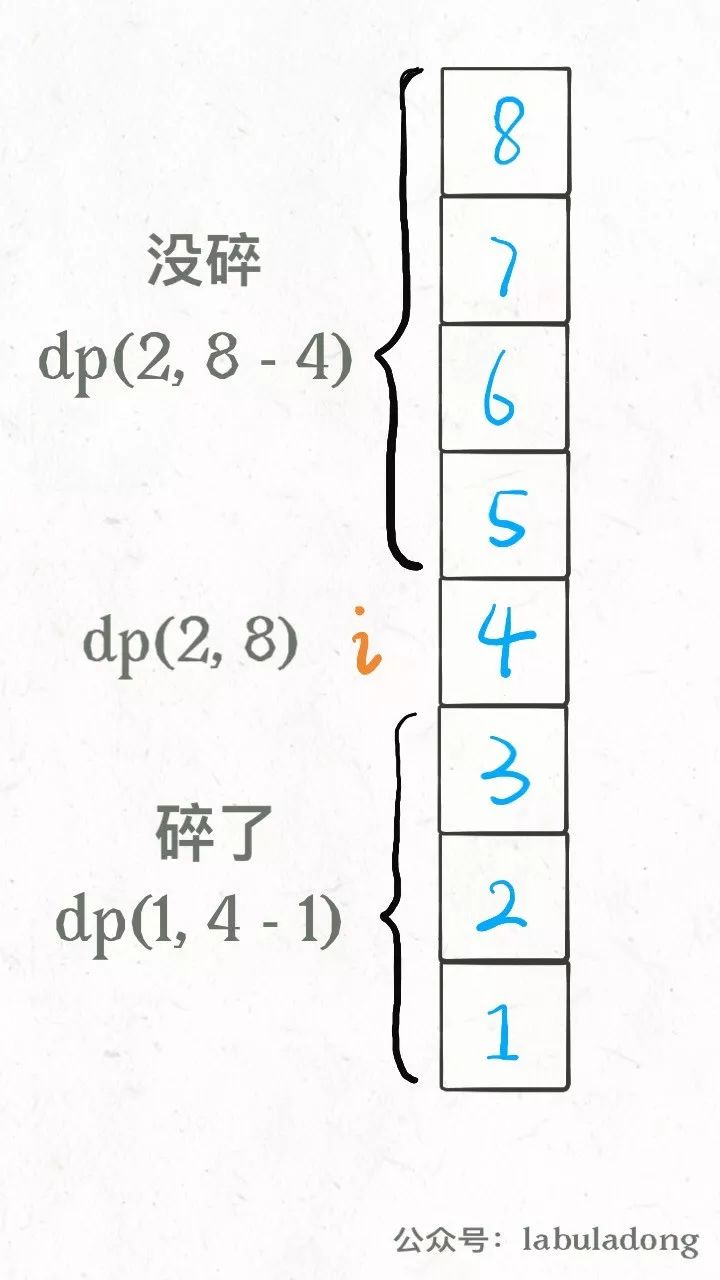

 「状态」很明显，就是当前拥有的鸡蛋数K和需要测试的楼层数N。随着测试的进行，鸡蛋个数可能减少，楼层的搜索范围会减小，这就是状态的变化。

「选择」其实就是去选择哪层楼扔鸡蛋。

😎如果鸡蛋碎了，那么鸡蛋的个数K应该减一，搜索的楼层区间应该从[1..N]变为[1..i-1]共i-1层楼；

🤨如果鸡蛋没碎，那么鸡蛋的个数K不变，搜索的楼层区间应该从 [1..N]变为[i+1..N]共N-i层楼。

In [18]:
def superEggDrop(K,N):

    memo = dict()
    def dp(K, N) -> int:
        # base case
        if K == 1: return N
        if N == 0: return 0
        # 避免重复计算
        if (K, N) in memo:
            return memo[(K, N)]

        res = float('INF')
        # 穷举所有可能的选择
        for i in range(1, N + 1):
            res = min(res, 
                      max(
                            dp(K, N - i), 
                            dp(K - 1, i - 1)
                         ) + 1
                  )
        # 记入备忘录
        memo[(K, N)] = res
        return res

    return dp(K, N)

In [20]:
superEggDrop(2,100)

14

In [14]:
def egg(n,k):
    dp=[[0]*k for i in range(n)]
    for i in range(n):
        dp[i][0]=0
        dp[i][1]=i
    for i in range(k):
        dp[0][i]=0
    
    res =n
    for i in range(1,n+1):
        for j in range(2,k+1):
            for ith in range(i+1):
                dp[i][j]=max(dp[i-ith][j],dp[i-1][j-1])
                res=min(res,dp[i][j])+1
    return res

In [15]:
egg(100,2)

IndexError: list index out of range

In [2]:
[[0]*3 for i in range(5)]

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

# 区间调度

In [ ]:
def call():
    a =int(input())
    
    if a==0:
        return 0
    

    l=[]
    for i in range(a):
        n1,n2=map(int, input().split(','))
        l.append((n1,1))
        l.append((n2,0))

    l.sort(key=lambda x:(x[0],x[1]))
    res=0
    now =0
    for (v,type) in l:
        if type==1:
            now+=1
        else:
            now-=1
        res=max(res,now)
    return res

# 打家劫舍

### 打家劫舍

In [ ]:
class Solution:
    def rob(self, nums: List[int]):
        n=len(nums)
        dp=[0]*len(nums)
# if nums_list is empty
        if n==0:
            return 0
       
        for i in range(n):  
# base case 
            if i==0:
                dp[i]=nums[0]
            if i==1:
                dp[i]= max(nums[0],nums[1]) 
# transfer function
            if i>=2:     
                dp[i] =max(dp[i-1],nums[i]+dp[i-2])

        return dp[n-1]

# 股票交易

### 买卖股票最佳时机

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        if len(prices)==0:
            return 0
        buy=prices[0]
        profit=prices[-1]-prices[0]
     
        n =len(prices)
        for i in range(n):
           
            buy =min(buy,prices[i])
            profit =max(profit,prices[i]-buy)
            

        return profit

# 不同的BST

In [ ]:
class Solution:
    def numTrees(self, n: int) -> int:
        # 以数字k为根 的可能BST数=左子树的BST数*右子树的BST数
        # F(k,N)=G(k-1)*G(N-k) 只和长度有关，和数字内容无关
        # G（N）=F(1,N)+F(2,N)+F(3,N)...+F(k,N)+F(N,N)
        # G（N-1）=F(1,N-1)+F(2,N-1)+F(3,N-1)...+F(k,N-1)+...+F(N-1,N-1)
        # G（N-2）=F(1,N-2)+F(2,N-2)+F(3,N-2)...+F(k,N-2)+...+F(N-2,N-2)
        # .
        # .
        # G(3)=F(1,3)+F(2,3)+F(3,3)
        # G(2)=F(1,2)+F(2,2)
        # G(1)=1
        # G(0)=1
        dp=[0]*(n+1)
        dp[0]=1
        dp[1]=1
        for k in range(2,n+1):
            for j in range(1,k+1):
                dp[k]+=dp[j-1]*dp[k-j]

        return dp[n]